<a href="https://colab.research.google.com/github/rohithsarikela/IdentifyingShoppingTrendsusingDataAnalysis/blob/main/intershipproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd



In [5]:
data=pd.read_csv("/content/shopping_trends.csv")




In [6]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [9]:
data.duplicated().sum()

0

In [10]:
data.shape


(3900, 19)

In [11]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [12]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
data.describe(include="object")

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


# DESCRIPTIVE ***ANAYLYSIS***

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [15]:
data["Age_category"] = pd.cut(data["Age"], bins=[0, 18, 35, 60, 100], labels=["Child", "Youth", "Adult", "Senior"])


(array([   0., 1241., 1871.,  788.]),
 array([  0.,  18.,  35.,  60., 100.]),
 <BarContainer object of 4 artists>)

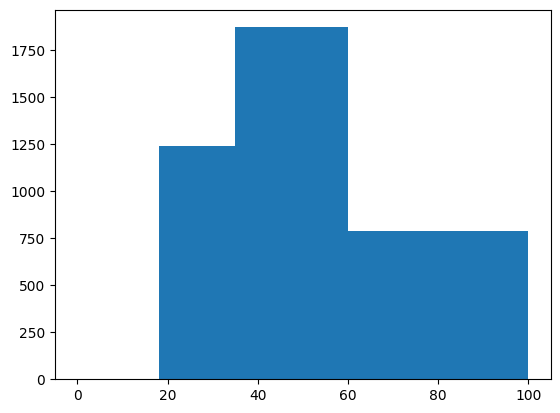

In [16]:
plt.hist(data["Age"],bins=[0, 18, 35, 60, 100])

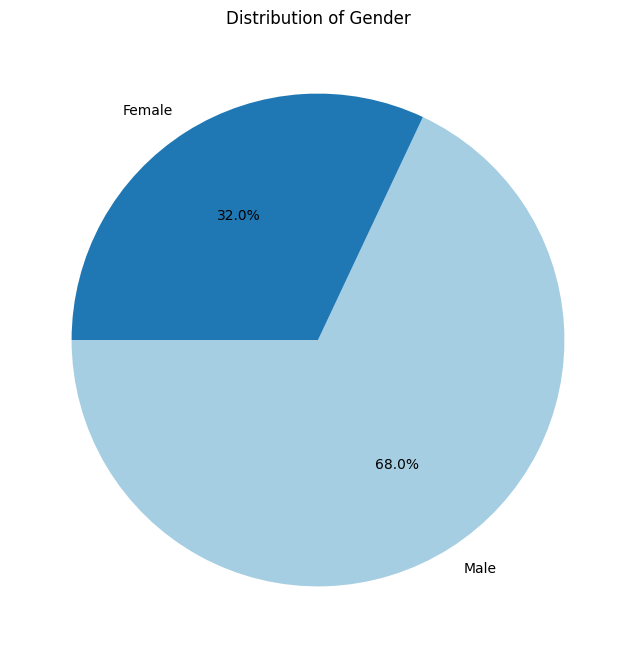

In [17]:
# Calculate counts for Male and Female
gender_counts = data["Gender"].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Paired.colors)

# Add title
plt.title("Distribution of Gender")
plt.show()


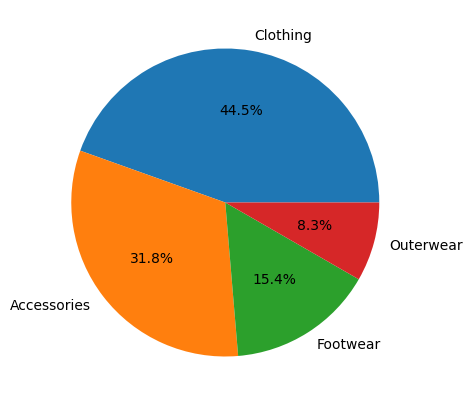

In [18]:
plt.figure(figsize=(10,5))
data_catagory=data["Category"].value_counts()
plt.pie(data_catagory,labels=data_catagory.index,autopct='%1.1f%%')
plt.show()

In [19]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

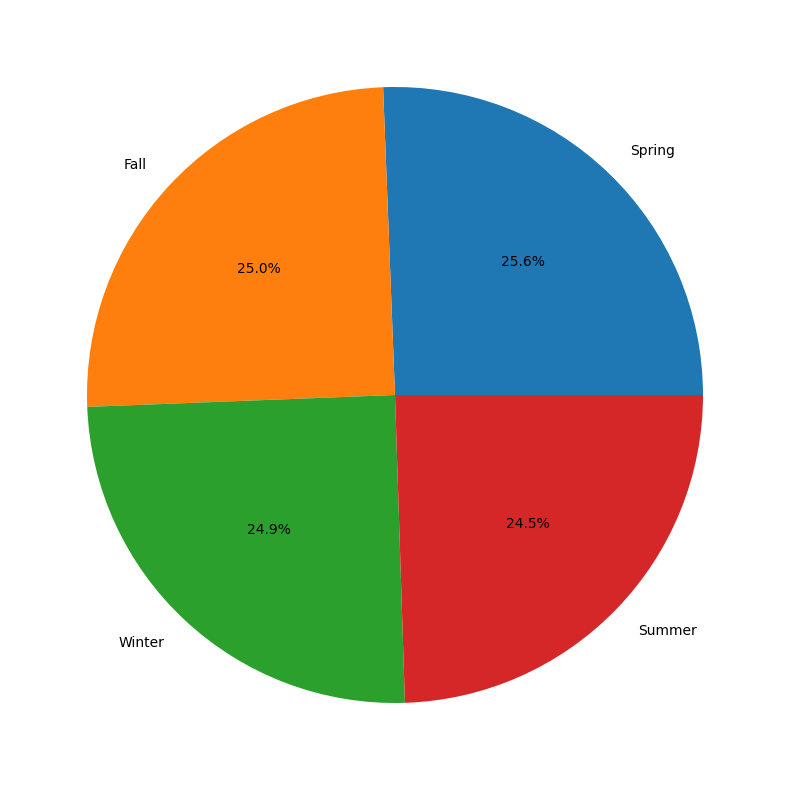

In [20]:
plt.figure(figsize=(20,10))
data_sesons=data["Season"].value_counts()
plt.pie(data_sesons,labels=data_sesons.index,autopct='%1.1f%%')
plt.show()

In [21]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [22]:
datapayment=data.groupby("Payment Method")["Purchase Amount (USD)"].mean().sort_values(ascending=False)

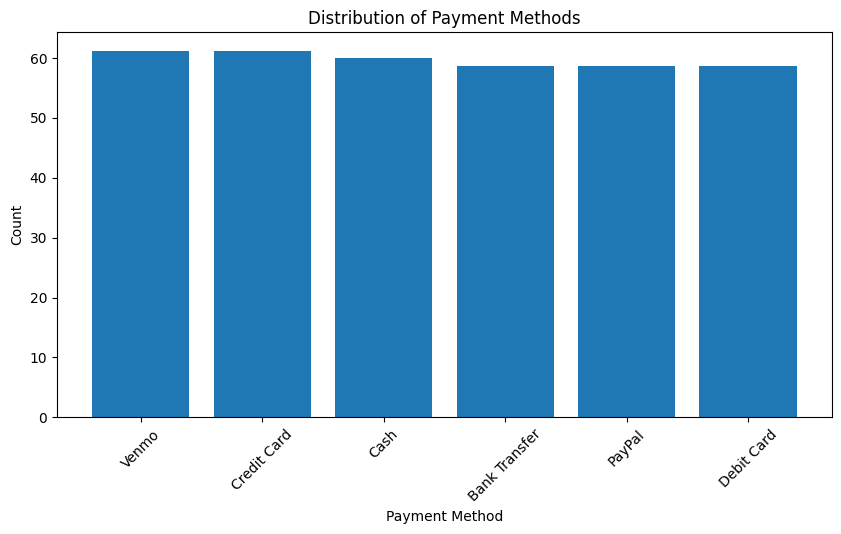

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(datapayment.index, datapayment.values)  # Corrected arguments for plt.bar
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.title("Distribution of Payment Methods")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Customer ID               3900 non-null   int64   
 1   Age                       3900 non-null   int64   
 2   Gender                    3900 non-null   object  
 3   Item Purchased            3900 non-null   object  
 4   Category                  3900 non-null   object  
 5   Purchase Amount (USD)     3900 non-null   int64   
 6   Location                  3900 non-null   object  
 7   Size                      3900 non-null   object  
 8   Color                     3900 non-null   object  
 9   Season                    3900 non-null   object  
 10  Review Rating             3900 non-null   float64 
 11  Subscription Status       3900 non-null   object  
 12  Payment Method            3900 non-null   object  
 13  Shipping Type             3900 non-null   object

In [25]:
data_numaric=data.select_dtypes(include=["int64","float64"])
data_numaric

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,3.1,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31
...,...,...,...,...,...
3895,3896,40,28,4.2,32
3896,3897,52,49,4.5,41
3897,3898,46,33,2.9,24
3898,3899,44,77,3.8,24


<Axes: >

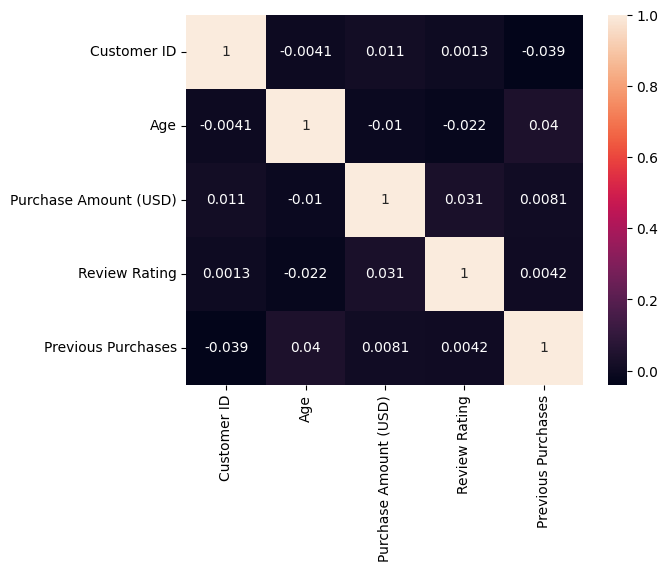

In [26]:
sns.heatmap(data_numaric.corr(),annot=True)

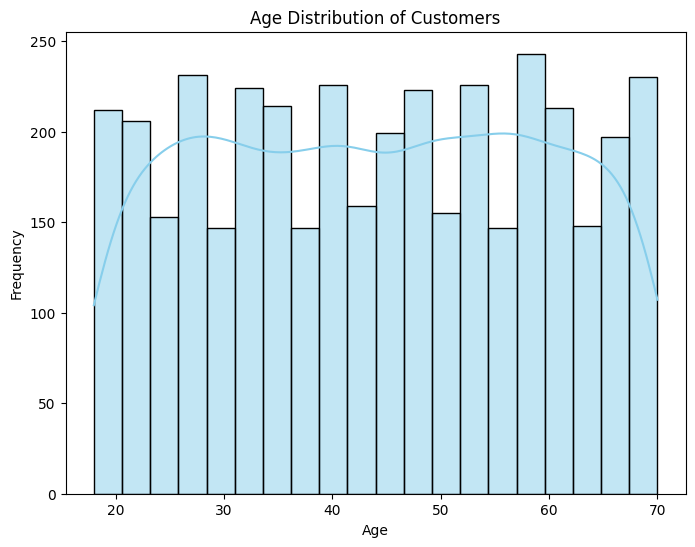

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64


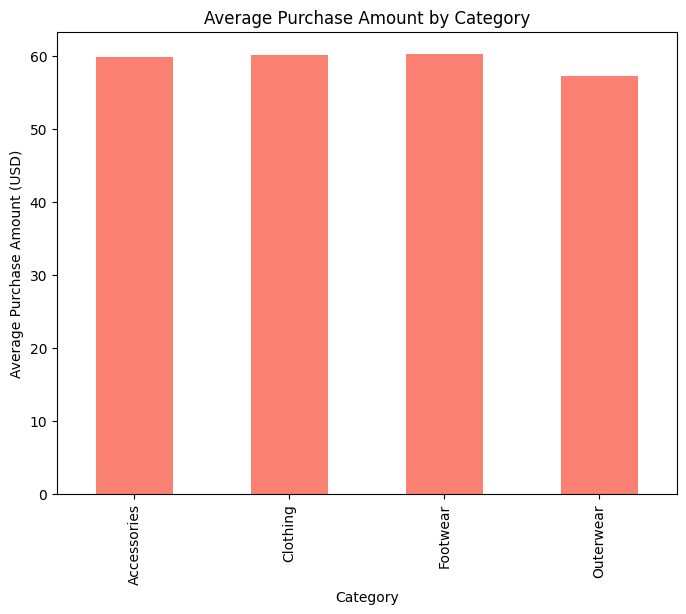

In [31]:
avg_purchase = data.groupby('Category')['Purchase Amount (USD)'].mean()
print(avg_purchase)
avg_purchase.plot(kind='bar', color='salmon', figsize=(8, 6))
plt.title('Average Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

Gender
Male      2652
Female    1248
Name: count, dtype: int64


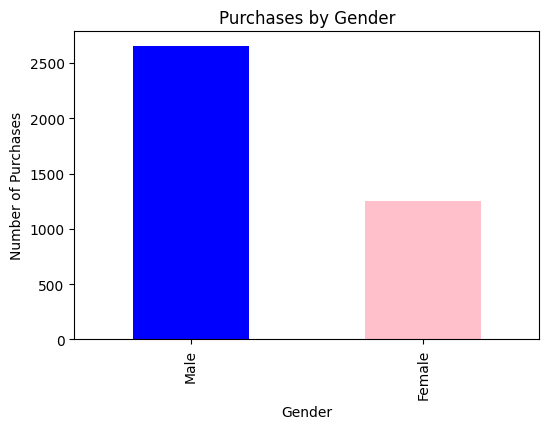

In [32]:
gender_counts = data['Gender'].value_counts()
print(gender_counts)
gender_counts.plot(kind='bar', color=['blue', 'pink'], figsize=(6, 4))
plt.title('Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()

In [33]:
most_common = data.groupby('Category')['Item Purchased'].apply(lambda x: x.mode().iloc[0])
print(most_common)

Category
Accessories    Jewelry
Clothing        Blouse
Footwear       Sandals
Outerwear       Jacket
Name: Item Purchased, dtype: object


Season
Fall      61.556923
Spring    58.737738
Summer    58.405236
Winter    60.357364
Name: Purchase Amount (USD), dtype: float64


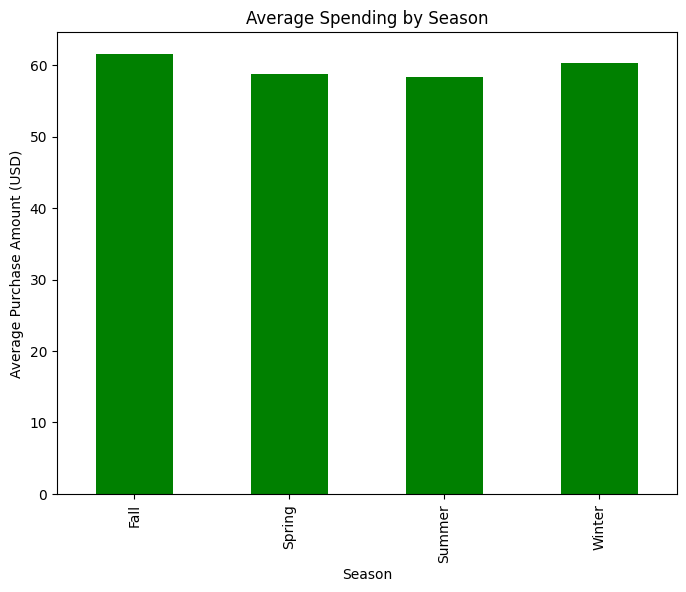

In [34]:
avg_seasonal_spending = data.groupby('Season')['Purchase Amount (USD)'].mean()
print(avg_seasonal_spending)
avg_seasonal_spending.plot(kind='bar', color='green', figsize=(8, 6))
plt.title('Average Spending by Season')
plt.xlabel('Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

Category
Accessories    3.768629
Clothing       3.723143
Footwear       3.790651
Outerwear      3.746914
Name: Review Rating, dtype: float64


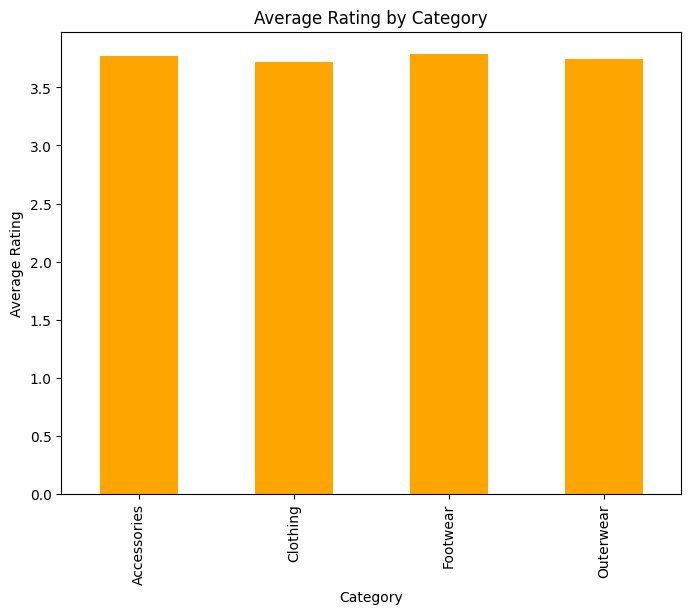

In [35]:
avg_rating = data.groupby('Category')['Review Rating'].mean()
print(avg_rating)
avg_rating.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.show()

Subscription Status
No     2847
Yes    1053
Name: count, dtype: int64


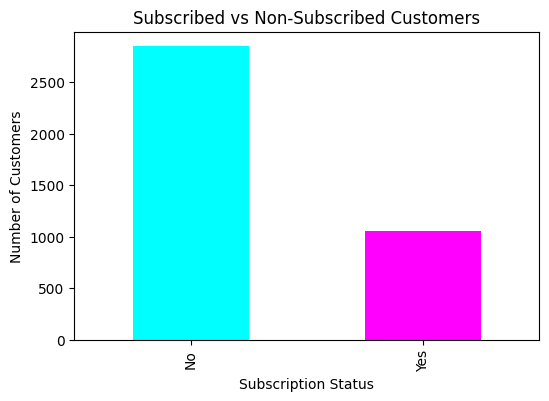

In [36]:
subscription_counts = data['Subscription Status'].value_counts()
print(subscription_counts)
subscription_counts.plot(kind='bar', color=['cyan', 'magenta'], figsize=(6, 4))
plt.title('Subscribed vs Non-Subscribed Customers')
plt.xlabel('Subscription Status')
plt.ylabel('Number of Customers')
plt.show()


Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64


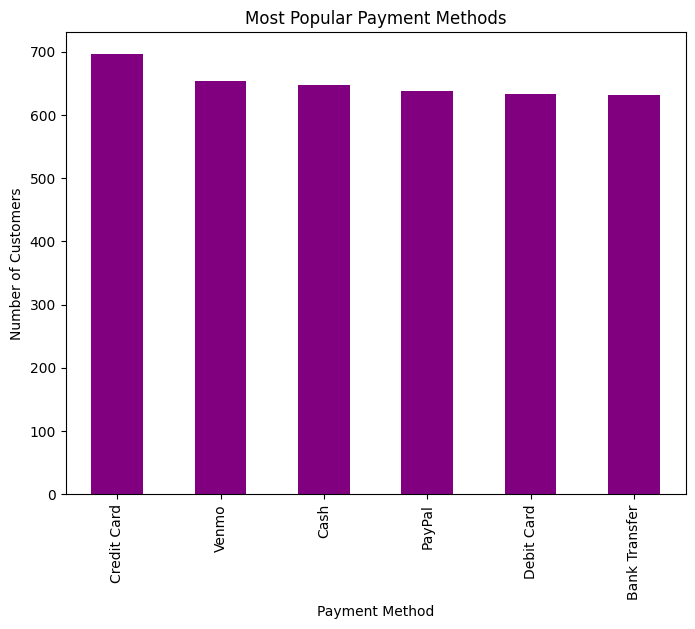

In [37]:
payment_counts = data['Payment Method'].value_counts()
print(payment_counts)
payment_counts.plot(kind='bar', color='purple', figsize=(8, 6))
plt.title('Most Popular Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.show()

Promo Code Used
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64


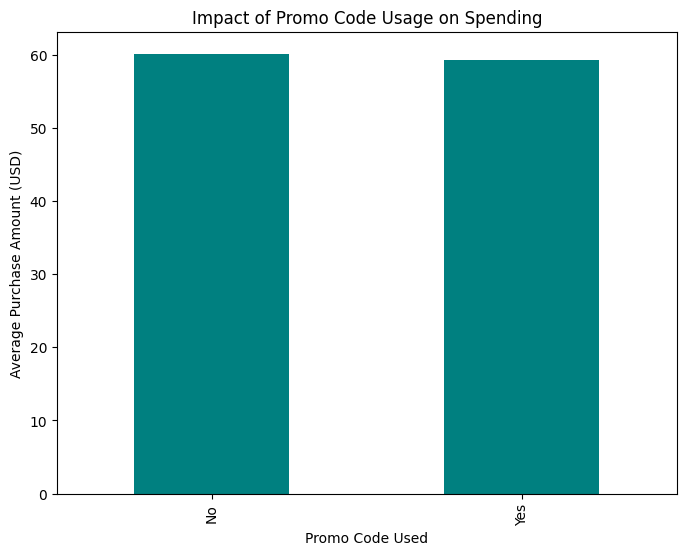

In [38]:
promo_usage = data.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
print(promo_usage)
promo_usage.plot(kind='bar', color='teal', figsize=(8, 6))
plt.title('Impact of Promo Code Usage on Spending')
plt.xlabel('Promo Code Used')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()


<ipython-input-39-88bafb71f4cf>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency = data.groupby('Age Group')['Frequency of Purchases'].value_counts()


Age Group  Frequency of Purchases
<20        Every 3 Months             27
           Fortnightly                27
           Bi-Weekly                  22
           Quarterly                  22
           Annually                   20
           Monthly                    17
           Weekly                     15
20-29      Bi-Weekly                 125
           Quarterly                 111
           Every 3 Months            105
           Annually                  101
           Monthly                    99
           Fortnightly                94
           Weekly                     93
30-39      Every 3 Months            121
           Annually                  109
           Monthly                   107
           Fortnightly               106
           Weekly                    101
           Quarterly                  92
           Bi-Weekly                  88
40-49      Monthly                   116
           Every 3 Months            111
           Weekly      

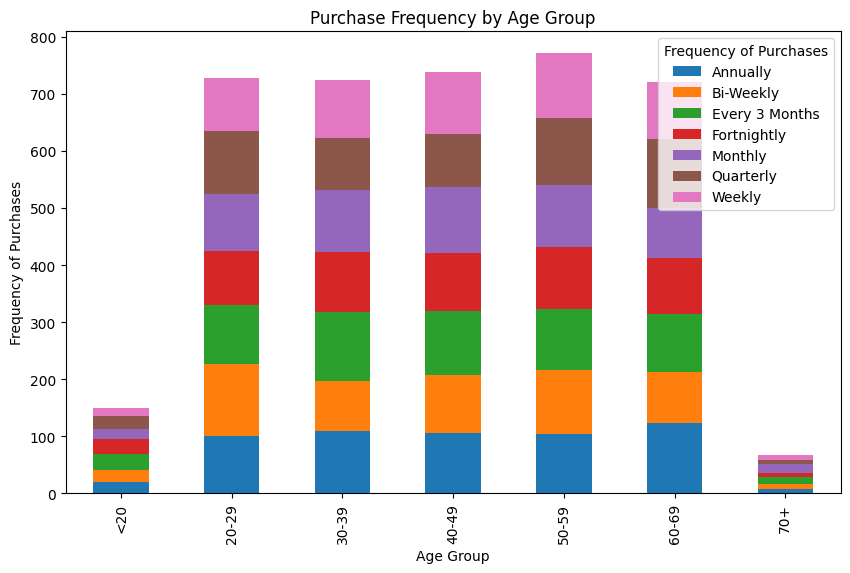

In [39]:
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
frequency = data.groupby('Age Group')['Frequency of Purchases'].value_counts()
print(frequency)
frequency.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Purchase Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency of Purchases')
plt.show()